In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use("fivethirtyeight")


In [0]:
df_train = pd.read_csv("../Datasets/Animal State Prediction - dataset/train.csv")
df_test= pd.read_csv("../Datasets/Animal State Prediction - dataset/test.csv")

df_merged = pd.concat(objs=[df_train,df_test],axis=0,ignore_index=False).sort_values(by="animal_id_outcome")


In [8]:
df_merged.head()

,age_upon_intake,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,age_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,animal_id_outcome,animal_type,...,outcome_month,outcome_monthyear,outcome_number,outcome_type,outcome_weekday,outcome_year,sex_upon_intake,sex_upon_outcome,time_in_shelter,time_in_shelter_days
0,10 years,3650,10.0,"(7.5, 10.0]",10 years,3650,10.0,"(7.5, 10.0]",A006100,Dog,...,12,2017-12,1.0,Return to Owner,Thursday,2017,Neutered Male,Neutered Male,0 days 14:07:00.000000000,0.588194
1,7 years,2555,7.0,"(5.0, 7.5]",7 years,2555,7.0,"(5.0, 7.5]",A006100,Dog,...,12,2014-12,2.0,Return to Owner,Saturday,2014,Neutered Male,Neutered Male,1 days 06:14:00.000000000,1.259722
2,6 years,2190,6.0,"(5.0, 7.5]",6 years,2190,6.0,"(5.0, 7.5]",A006100,Dog,...,3,2014-03,3.0,Return to Owner,Saturday,2014,Neutered Male,Neutered Male,1 days 02:44:00.000000000,1.113889
3,10 years,3650,10.0,"(7.5, 10.0]",10 years,3650,10.0,"(7.5, 10.0]",A047759,Dog,...,4,2014-04,1.0,Missing,Monday,2014,Neutered Male,Neutered Male,4 days 23:17:00.000000000,4.970139
4,16 years,5840,16.0,"(15.0, 17.5]",16 years,5840,16.0,"(15.0, 17.5]",A134067,Dog,...,11,2013-11,1.0,Return to Owner,Saturday,2013,Neutered Male,Neutered Male,0 days 02:52:00.000000000,0.119444


In [9]:
# check data-type of each variable
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79672 entries, 0 to 31868
Data columns (total 37 columns):
age_upon_intake               79672 non-null object
age_upon_intake_(days)        79672 non-null int64
age_upon_intake_(years)       79672 non-null float64
age_upon_intake_age_group     79672 non-null object
age_upon_outcome              79672 non-null object
age_upon_outcome_(days)       79672 non-null int64
age_upon_outcome_(years)      79672 non-null float64
age_upon_outcome_age_group    79672 non-null object
animal_id_outcome             79672 non-null object
animal_type                   79672 non-null object
breed                         79672 non-null object
color                         79672 non-null object
count                         79672 non-null int64
date_of_birth                 79672 non-null object
dob_month                     79672 non-null int64
dob_year                      79672 non-null int64
intake_condition              79672 non-null object
intake_dat

In above we can see that datatype for some of the feature_columns such as dates are not correct. Also, some of the columns can be converted to categorical. let's do that first

In [0]:
# for training dataset

for i in df_merged[["intake_datetime","outcome_datetime"]]:
    df_merged[i]=pd.to_datetime(df_merged[i])
    
df_merged["time_in_shelter"] = pd.to_timedelta(df_merged["time_in_shelter"])

df_merged["age_upon_intake"] = df_merged["age_upon_intake"].str.split(" ").str.get(0).astype("int32")
df_merged["age_upon_outcome"] = df_merged["age_upon_outcome"].str.split(" ").str.get(0).astype("int32")

# also convert categorical_variables to categorical to reduce memory usage

for i in df_merged[["animal_type","breed","color","intake_condition","intake_type","sex_upon_intake","outcome_type",
                   "sex_upon_outcome","outcome_weekday","outcome_year"]]:
    df_merged[i] = df_merged[i].astype("category")

In [11]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79672 entries, 0 to 31868
Data columns (total 37 columns):
age_upon_intake               79672 non-null int32
age_upon_intake_(days)        79672 non-null int64
age_upon_intake_(years)       79672 non-null float64
age_upon_intake_age_group     79672 non-null object
age_upon_outcome              79672 non-null int32
age_upon_outcome_(days)       79672 non-null int64
age_upon_outcome_(years)      79672 non-null float64
age_upon_outcome_age_group    79672 non-null object
animal_id_outcome             79672 non-null object
animal_type                   79672 non-null category
breed                         79672 non-null category
color                         79672 non-null category
count                         79672 non-null int64
date_of_birth                 79672 non-null object
dob_month                     79672 non-null int64
dob_year                      79672 non-null int64
intake_condition              79672 non-null category
inta

In [12]:
print ('The dataset has {0} rows and {1} columns'.format(df_merged.shape[0],df_merged.shape[1]))

The dataset has 79672 rows and 37 columns


In [0]:
# check if there are any duplicates in animal_id_outcome column

df_merged["animal_id_outcome"].value_counts()

df_merged.drop_duplicates(subset=["animal_id_outcome"],inplace=True)

In [14]:
print ('The dataset has {0} rows and {1} columns'.format(df_merged.shape[0],df_merged.shape[1]))

The dataset has 71961 rows and 37 columns


### Data Cleaning and Null Values Removal

In [15]:
# check null values in each column of dataset
df_merged.isnull().sum()

age_upon_intake                   0
age_upon_intake_(days)            0
age_upon_intake_(years)           0
age_upon_intake_age_group         0
age_upon_outcome                  0
age_upon_outcome_(days)           0
age_upon_outcome_(years)          0
age_upon_outcome_age_group        0
animal_id_outcome                 0
animal_type                       0
breed                             0
color                             0
count                             0
date_of_birth                     0
dob_month                         0
dob_year                          0
intake_condition                  0
intake_datetime                   0
intake_hour                       0
intake_month                      0
intake_monthyear                  0
intake_number                     0
intake_type                       0
intake_weekday                    0
intake_year                       0
outcome_datetime               8588
outcome_hour                      0
outcome_month               

Out of 38 features, only 3 features have missing values viz. 
- sex_upon_intake, 
- sex_upon_outcome 
- outcome_datetime 

- Missing value in "outcome_type" is the target value.

In [0]:
# inputing missing values of outcome_datetime. This can easily be computed by adding intake_datetime and time that animal spent
# in shelter.

df_merged["outcome_datetime"] = df_merged["intake_datetime"] + df_merged["time_in_shelter"]

In [17]:
df_merged["outcome_datetime"].isnull().sum()

# so now, no null value in outcome_datetime column.

0

In [18]:
df_merged[df_merged["sex_upon_outcome"].isnull()]

,age_upon_intake,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,age_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,animal_id_outcome,animal_type,...,outcome_month,outcome_monthyear,outcome_number,outcome_type,outcome_weekday,outcome_year,sex_upon_intake,sex_upon_outcome,time_in_shelter,time_in_shelter_days
6523,7,2555,7.0,"(5.0, 7.5]",7,2555,7.0,"(5.0, 7.5]",A667395,Dog,...,11,2013-11,1.0,Return to Owner,Wednesday,2013,NaN,NaN,10 days 02:56:00,10.122222


In [19]:
df_merged[df_merged["sex_upon_intake"].isnull()]

,age_upon_intake,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,age_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,animal_id_outcome,animal_type,...,outcome_month,outcome_monthyear,outcome_number,outcome_type,outcome_weekday,outcome_year,sex_upon_intake,sex_upon_outcome,time_in_shelter,time_in_shelter_days
6523,7,2555,7.0,"(5.0, 7.5]",7,2555,7.0,"(5.0, 7.5]",A667395,Dog,...,11,2013-11,1.0,Return to Owner,Wednesday,2013,NaN,NaN,10 days 02:56:00,10.122222


In [0]:
# so this is just a single entry where "sex_upon_outcome" and "sex_upon_intake" are NaNs, this can be dropped.

df_merged.dropna(axis=0,subset=["sex_upon_intake","sex_upon_outcome"],inplace=True)

In [21]:
df_merged.shape

(71960, 37)

In [22]:
df_merged.isnull().sum()

age_upon_intake                   0
age_upon_intake_(days)            0
age_upon_intake_(years)           0
age_upon_intake_age_group         0
age_upon_outcome                  0
age_upon_outcome_(days)           0
age_upon_outcome_(years)          0
age_upon_outcome_age_group        0
animal_id_outcome                 0
animal_type                       0
breed                             0
color                             0
count                             0
date_of_birth                     0
dob_month                         0
dob_year                          0
intake_condition                  0
intake_datetime                   0
intake_hour                       0
intake_month                      0
intake_monthyear                  0
intake_number                     0
intake_type                       0
intake_weekday                    0
intake_year                       0
outcome_datetime                  0
outcome_hour                      0
outcome_month               

In [23]:
# so now there are no null values in our data except 29282 in outcome_type i.e. our target variable.

print ('The train data has {0} rows and {1} columns after Null values correction'.format(df_merged.shape[0],df_merged.shape[1]))


The train data has 71960 rows and 37 columns after Null values correction


### Exploratory Data Analysis 

### Relation Between animal_type and Outcome_type

In [24]:
df_merged["outcome_type"].nunique()

# so its a multi-class classification problem

9

In [25]:
df_merged["animal_type"].value_counts()/df_merged["animal_type"].value_counts().sum()*100

# 4 different type of animals, out of which 59% are Dogs and 35% are cats, rest both dont have much proportion

Dog      54.068927
Cat      39.331573
Other     6.128405
Bird      0.471095
Name: animal_type, dtype: float64

In [26]:
# Lets check the distribution of Outcome across different animal_type

df_merged.groupby(by=["animal_type","outcome_type"]).count()["count"].unstack(level=0).sort_index(ascending=True)


animal_type,Bird,Cat,Dog,Other
outcome_type,,,,
Adoption,49,4340,6853,27
Died,13,1218,1281,94
Disposal,17,2,3,156
Euthanasia,32,1004,1269,1794
Missing,7,1072,1251,35
Relocate,11,1085,1198,40
Return to Owner,2,821,6769,17
Rto-Adopt,7,1000,1186,31
Transfer,34,5644,4058,258


In [27]:
#Let's check the distribution in percentage terms.

a = df_merged.groupby(by=["animal_type","outcome_type"]).count()["count"].unstack(level=0)
b = df_merged.groupby(by=["outcome_type"]).count()["animal_type"]
animal_type_and_outcome =a.div(other = b,level="animal_type",axis=0)*100
animal_type_and_outcome

animal_type,Bird,Cat,Dog,Other
outcome_type,,,,
Adoption,0.434821,38.512734,60.812849,0.239595
Died,0.498849,46.738296,49.155794,3.607061
Disposal,9.550562,1.123596,1.685393,87.640449
Euthanasia,0.780678,24.493779,30.958770,43.766772
Missing,0.295983,45.327696,52.896406,1.479915
Relocate,0.471294,46.486718,51.328192,1.713796
Return to Owner,0.026285,10.789854,88.960442,0.223420
Rto-Adopt,0.314748,44.964029,53.327338,1.393885
Transfer,0.340204,56.473884,40.604363,2.581549


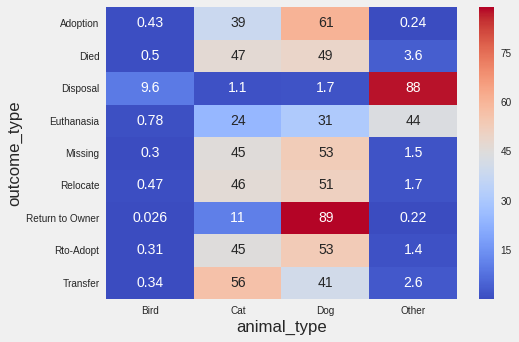

In [28]:
plt.figure(figsize=(7,5))
sns.heatmap(data=animal_type_and_outcome,cmap = "coolwarm", annot = True)

Text(0.5,0,'Outcome Type')

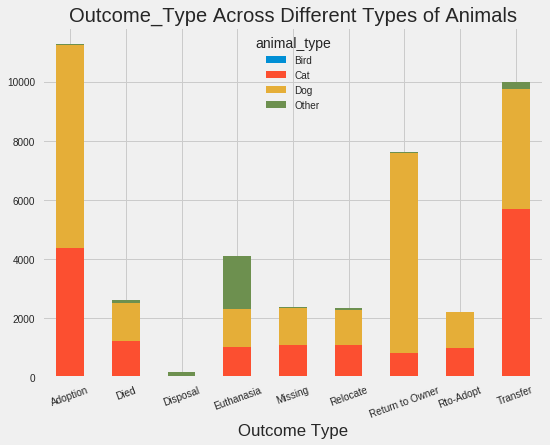

In [29]:
a.plot(kind="bar",stacked=True,figsize = (8,6),title = "Outcome_Type Across Different Types of Animals",rot=20)
plt.xlabel("Outcome Type")

From above, we can infer that Adoption, transfer and Returned to Owner have more proportion than other outcome_types. Moreover, we can see that more dogs have been returned to owner than cats. This may be attributed to the intake conditions of the animals. Let's checkout the intake_condition of Animals and whether they're affecting the Outcome_type

### Relation Between Intake_condition and Outcome_type in Percentage Terms

In [30]:

a = df_merged.groupby(by=["intake_condition","outcome_type"]).count()["count"].unstack(level=0)
b = df_merged.groupby(by=["intake_condition"]).count()["animal_type"]
intake_condition_and_outcome =a.div(other = b,level="intake_condition",axis=1)*100
intake_condition_and_outcome

intake_condition,Aged,Feral,Injured,Normal,Nursing,Other,Pregnant,Sick
outcome_type,,,,,,,,
Adoption,8.026756,10.112360,9.679958,16.684750,10.111762,10.294118,17.073171,6.567657
Died,3.010033,3.370787,3.384050,3.556499,6.386376,3.676471,7.317073,3.564356
Disposal,NaN,NaN,0.419727,0.201040,NaN,NaN,NaN,1.188119
Euthanasia,20.401338,3.370787,24.527807,3.436832,1.809473,11.029412,NaN,29.603960
Missing,2.006689,5.617978,2.046170,3.417685,4.044705,2.205882,NaN,1.815182
Relocate,2.675585,4.494382,1.836306,3.352267,3.831825,7.352941,2.439024,2.244224
Return to Owner,26.421405,4.494382,7.240294,11.389093,0.904737,9.558824,7.317073,2.607261
Rto-Adopt,1.337793,2.247191,2.046170,3.192711,4.204364,2.205882,2.439024,1.848185
Transfer,8.695652,31.460674,8.735572,13.798385,28.791911,20.588235,9.756098,12.739274


Text(0.5,0,'Outcome Type')

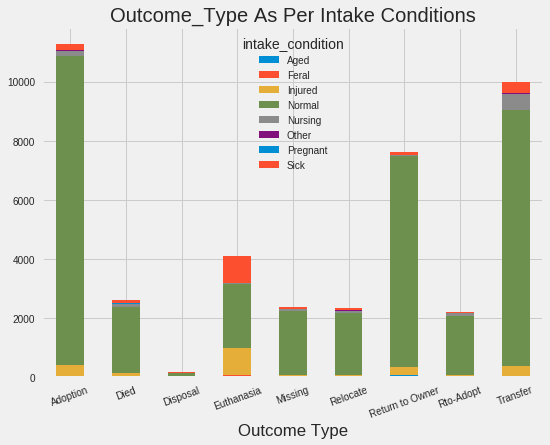

In [31]:
a.plot(kind="bar",stacked=True,figsize = (8,6),title = "Outcome_Type As Per Intake Conditions",rot=20)
plt.xlabel("Outcome Type")

Here we cannot see any as such pattern in the outcome_type as per the intake condition. 

- Major proportion of animals at the time of intake were Normal. The only thing is that the animals which were sick, or injured were subjected to Euthanasia.

- Also, 51% of the Feral animals were transferred.

### Relation Between sex_upon_outcome and Outcome_type in Percentage Terms

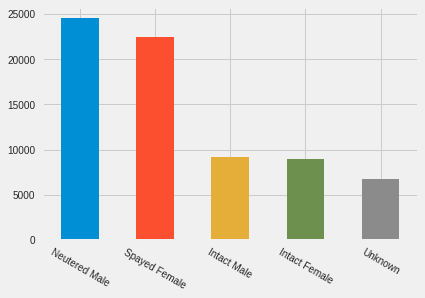

In [32]:
SexuponOutcome = df_merged['sex_upon_outcome'].value_counts()
SexuponOutcome.plot(kind='bar',rot=-30)

In [0]:
# We can create a grouping for all Male and Females separately. Also for all Neutered, Spayed and Intact

M_F = {'Neutered Male':'Male','Spayed Female':'Female','Intact Male':'Male','Intact Female':'Female','Unknown':'Unknown'}
N_T = {'Neutered Male':'Neutered','Spayed Female':'Neutered','Intact Male':'Intact','Intact Female':'Intact','Unknown':'Unknown'}

df_merged['Sex'] = df_merged['sex_upon_outcome'].map(M_F)
df_merged['Neutered'] = df_merged['sex_upon_outcome'].map(N_T)

df_merged['Sex'] = df_merged['Sex'].astype("category")
df_merged['Neutered'] = df_merged['Neutered'].astype("category")

Text(0.5,0,'Outcome Type')

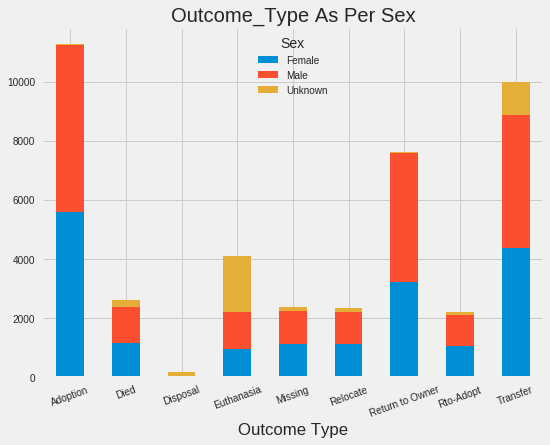

In [34]:
# sex and outcome type

a = df_merged.groupby(by=["Sex","outcome_type"]).count()["count"].unstack(level=0)
a.plot(kind="bar",stacked=True,figsize = (8,6),title = "Outcome_Type As Per Sex",rot=20)
plt.xlabel("Outcome Type")

From above, we can see that there is no as such pattern in Outcomes given the Sex of Animal

Text(0.5,0,'Outcome Type')

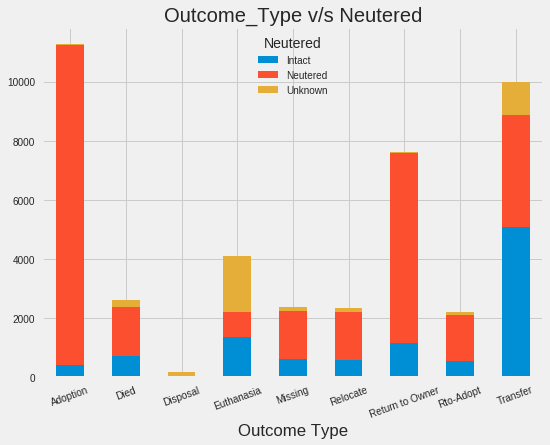

In [35]:
# Neutered and outcome type

a = df_merged.groupby(by=["Neutered","outcome_type"]).count()["count"].unstack(level=0)
a.plot(kind="bar",stacked=True,figsize = (8,6),title = "Outcome_Type v/s Neutered",rot=20)
plt.xlabel("Outcome Type")

From above plot, we can infer that most of the Neutered animals were adopted or were Returned to owner

### Check Correlation among various Numerical feature columns

In [36]:
df_merged.shape

(71960, 39)

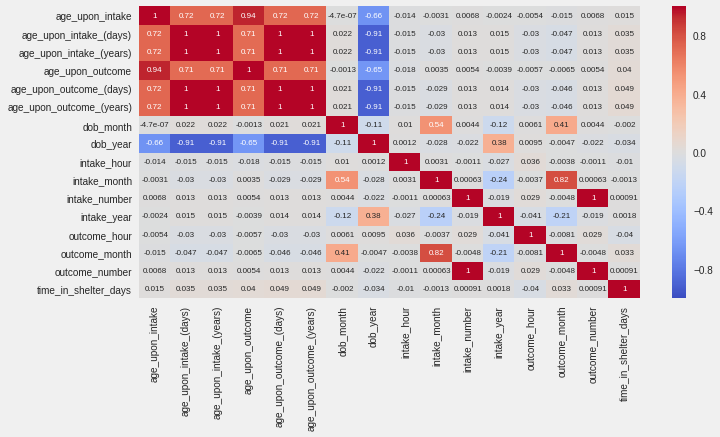

In [37]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df_merged.drop(labels=["count"],axis=1).corr(),cmap="coolwarm",annot=True,annot_kws={"size":8})

We can see that following columns are highly correlated and need to be dropped

- intake number and outcome number  : so we can drop one of these at the time of model creation
- intake_year and outcome_year : so we can drop one of these at the time of model creation
- age_upon_intake (days),age_upon_intake (years),age_upon_intake : drop two of these at the time of model creation
- age_upon_outcome (days) and age_upon_outcome (years),age_upon_outcome : drop two of these at the time of model creation
- age_upon_intake ,age_upon_outcome : drop one of these



- intake_month and outcome_month : drop one of these
- dob_year and age_upon_intake (days) : drop one of these
- dob_year and age_upon_intake (years) : drop one of these
- dob_year and age_upon_outcome (days) : drop one of these
- dob_year and age_upon_outcome (years) : drop one of these

Variables to be dropped before model creation : intake no., intake year, age_upon_outcome_(days), age_upon_intake_(days), dob_year, "age_upon_outcome_(years),age_upon_intake_(years)

For categorical Columns "Drop" following highly correlated/same features
 - "sex_upon_outcome" and "sex_upon_intake" : since we have "Sex" and "Neutered" as separate columns
 - "age_upon_intake_age_group" : doesnt affect the Outcome_type in anyway
 - "outcome_datetime"
 - "intake_weekday"
 - outcome_weekday 
 - "intake_datetime"
 - "age_upon_outcome_age_group"
 - date_of_birth
 - intake_monthyear
 - outcome_monthyear
 

In [0]:
df_merged = df_merged.drop(["intake_number","intake_year","age_upon_intake_(days)","age_upon_intake_(years)","age_upon_outcome_(days)",
                          "age_upon_outcome_(years)","dob_year","count","age_upon_outcome","sex_upon_outcome","sex_upon_intake",
"age_upon_intake_age_group","outcome_datetime","intake_weekday","outcome_weekday","intake_datetime","intake_month",
                         "age_upon_outcome_age_group","date_of_birth","intake_monthyear","outcome_monthyear"],axis=1)

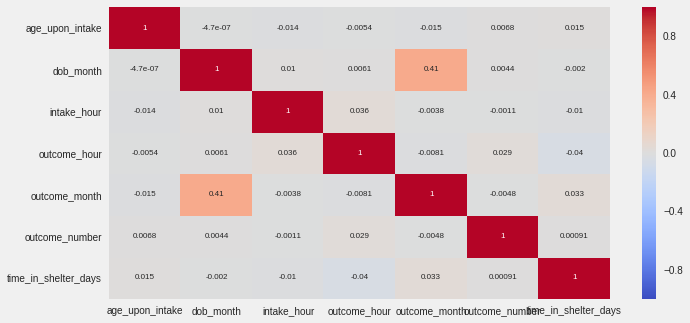

In [39]:
# Lets cross-check if correlated features are removed or not

plt.figure(figsize=(10,5))
sns.heatmap(data=df_merged.corr(),cmap="coolwarm",annot=True,annot_kws={"size":8})

So we have got rid off correlated features

In [40]:
print("df_merged shape after dropping correlated features : {}".format(df_merged.shape))

df_merged shape after dropping correlated features : (71960, 18)


### Data Preprocessing : Categorical Columns

Here, we will pre-process our data before feeding it to learning algorithm. Firstly, we will transform our categorical variables. This is necessary because most ML algorithms do not accept categorical values, instead they are expected to be converted to numerical. LabelEncoder function from sklearn is used to encode variables

In [41]:
df_merged["outcome_year"].dtype

CategoricalDtype(categories=[2013, 2014, 2015, 2016, 2017, 2018], ordered=False)

In [42]:
df_merged["outcome_type"].value_counts()

Adoption           11269
Transfer            9994
Return to Owner     7609
Euthanasia          4099
Died                2606
Missing             2365
Relocate            2334
Rto-Adopt           2224
Disposal             178
Name: outcome_type, dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder

#choose catrgorical columns and applying label encoding

for i in df_merged[['animal_type', 'breed', 'color', 'intake_condition', 'intake_type',"outcome_year",
       'outcome_type', 'Sex', 'Neutered']]:
    df_merged[i] =  df_merged[i].cat.codes 

In [44]:
df_merged["outcome_type"].value_counts()

-1    29282
 0    11269
 8     9994
 6     7609
 3     4099
 1     2606
 4     2365
 5     2334
 7     2224
 2      178
Name: outcome_type, dtype: int64

In [0]:
y_predictions_decoder = {0:"Adoption", 1:"Transfer", 2:"Return to Owner",3:"Euthanasia",4:"Died",5:"Missing",6:"Relocate",
                         7:"Rto-Adopt",8:"Disposal"}

In [46]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71960 entries, 0 to 31868
Data columns (total 18 columns):
age_upon_intake         71960 non-null int32
animal_id_outcome       71960 non-null object
animal_type             71960 non-null int8
breed                   71960 non-null int16
color                   71960 non-null int16
dob_month               71960 non-null int64
intake_condition        71960 non-null int8
intake_hour             71960 non-null int64
intake_type             71960 non-null int8
outcome_hour            71960 non-null int64
outcome_month           71960 non-null int64
outcome_number          71960 non-null float64
outcome_type            71960 non-null int8
outcome_year            71960 non-null int8
time_in_shelter         71960 non-null timedelta64[ns]
time_in_shelter_days    71960 non-null float64
Sex                     71960 non-null int8
Neutered                71960 non-null int8
dtypes: float64(2), int16(2), int32(1), int64(4), int8(7), object(1), tim

### Model Creation

In [47]:
df_merged.head()

,age_upon_intake,animal_id_outcome,animal_type,breed,color,dob_month,intake_condition,intake_hour,intake_type,outcome_hour,outcome_month,outcome_number,outcome_type,outcome_year,time_in_shelter,time_in_shelter_days,Sex,Neutered
0,10,A006100,2,1982,527,7,3,14,3,0,12,1.0,6,4,0 days 14:07:00,0.588194,1,1
3,10,A047759,2,830,449,4,3,15,1,15,4,1.0,4,1,4 days 23:17:00,4.970139,1,1
4,16,A134067,2,1880,183,10,2,9,2,11,11,1.0,6,0,0 days 02:52:00,0.119444,1,1
5,15,A141142,2,1337,59,6,0,14,3,11,11,1.0,6,0,0 days 20:54:00,0.870833,0,1
6,15,A163459,2,1488,47,10,3,15,3,19,11,1.0,6,1,0 days 04:17:00,0.178472,0,0


In [48]:
df_merged.shape

(71960, 18)

In [0]:
# splitiing the cleaned df_merged data into testing and training data from order of "animal_id_outcome" i.e. all 
# animal_id_outcome after A723133 are into tesing dataset while the ones before that are into training dataset.

df_train = df_merged[df_merged["animal_id_outcome"] < "A723133" ]
df_test = df_merged[df_merged["animal_id_outcome"] >= "A723133" ].drop(labels=["outcome_type"],axis=1)


In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29282 entries, 0 to 31868
Data columns (total 17 columns):
age_upon_intake         29282 non-null int32
animal_id_outcome       29282 non-null object
animal_type             29282 non-null int8
breed                   29282 non-null int16
color                   29282 non-null int16
dob_month               29282 non-null int64
intake_condition        29282 non-null int8
intake_hour             29282 non-null int64
intake_type             29282 non-null int8
outcome_hour            29282 non-null int64
outcome_month           29282 non-null int64
outcome_number          29282 non-null float64
outcome_year            29282 non-null int8
time_in_shelter         29282 non-null timedelta64[ns]
time_in_shelter_days    29282 non-null float64
Sex                     29282 non-null int8
Neutered                29282 non-null int8
dtypes: float64(2), int16(2), int32(1), int64(4), int8(6), object(1), timedelta64[ns](1)
memory usage: 2.4+ MB


In [51]:
print(df_train.shape)
print(df_test.shape)

(42678, 18)
(29282, 17)


In [0]:
X_train = df_train.drop(["outcome_type","time_in_shelter","animal_id_outcome","dob_month","intake_hour","outcome_hour",
                        "outcome_month","outcome_year"],axis=1)
y_train = df_train["outcome_type"]

X_test = df_test.drop(["time_in_shelter","animal_id_outcome","dob_month","intake_hour","outcome_hour",
                        "outcome_month","outcome_year"],axis=1)


In [53]:
print("Shape of X_train : {}".format(X_train.shape))
print("Shape of y_train : {}".format(y_train.shape))
print("Shape of X_test : {}".format(X_test.shape))

Shape of X_train : (42678, 10)
Shape of y_train : (42678,)
Shape of X_test : (29282, 10)


### Using Xgboost

In [0]:
import xgboost as xgb
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import StratifiedKFold
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
  
n_iter = 10
k_fold = 5
  
cv = StratifiedKFold(y_train,n_folds=k_fold,shuffle=True)
  
# initialize the classifier
GB = xgb.XGBClassifier()
  
param_grid = {'max_depth': sp_randint(1, 90),
              'learning_rate': sp_uniform(loc=0e0,scale=1e0),
              'objective':['multi:softprob'],
              'nthread': [8],
              'missing': [np.nan],
              'reg_alpha': [0.01,0.017782794,0.031622777,0.056234133,\
                            0.1,0.17782794,0.31622777,0.56234133,1.,1.77827941,\
                            3.16227766,5.62341325,10.,\
                            17.7827941,31.6227766,56.2341325,100.],
              'colsample_bytree': sp_uniform(loc=0.2e0,scale=0.8e0),
              'subsample': sp_uniform(loc=0.2e0,scale=0.8e0),
              'n_estimators': sp_randint(50, 200)}
  
search_GB = RandomizedSearchCV(GB,param_grid,scoring='neg_log_loss',n_iter=n_iter,cv=cv,verbose=True).fit(X_train,y_train)
print(search_GB.best_score_)
print(search_GB.best_params_)

C:\Users\Urvashi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Urvashi\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [0]:
# generating predictions for training dataset

predictions = search_GB.predict(X_train)          # since we need to check model performance on training data

from sklearn.metrics import f1_score
f1_score(y_train,predictions,average="micro")

0.58543043254135618

### Using SVM

In [0]:
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import RandomizedSearchCV



Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]

kernels = ['poly', 'rbf']

n_iter = 10
k_fold = 5
  
cv = StratifiedKFold(y_train,n_folds=k_fold,shuffle=True)

param_grid = {"kernel" : kernels, 
              "C" : Cs, "gamma" : gammas, "probability": [True]}

svm = SVC()

svm_classifier = RandomizedSearchCV(svm,param_distributions=param_grid,n_iter=n_iter,scoring='log_loss',
                                    verbose=True,cv=cv).fit(X_train,y_train)
print(svm_classifier.best_score_)
print(svm_classifier.best_params_)

C:\Users\Urvashi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Urvashi\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [0]:
# generating predictions for training dataset

predictions = svm_classifier.predict(X_train)          # since we need to check model performance on training data

from sklearn.metrics import f1_score
f1_score(y_train,predictions,average="micro")

0.43122920474249021

**From above, we can see that with same no. of iterations (here=10), xgboost is giving better accuracy i.e. 58.5% against svm i.e. 43%. So letś try training Xgboost more (for more iterations).**

In [54]:
import xgboost as xgb
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import StratifiedKFold
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
  
n_iter = 30
k_fold = 5
  
cv = StratifiedKFold(y_train,n_folds=k_fold,shuffle=True)
  
# initialize the classifier
GB = xgb.XGBClassifier()
  
param_grid = {'max_depth': sp_randint(1, 90),
              'learning_rate': sp_uniform(loc=0e0,scale=1e0),
              'objective':['multi:softprob'],
              'nthread': [8],
              'missing': [np.nan],
              'reg_alpha': [0.01,0.017782794,0.031622777,0.056234133,\
                            0.1,0.17782794,0.31622777,0.56234133,1.,1.77827941,\
                            3.16227766,5.62341325,10.,\
                            17.7827941,31.6227766,56.2341325,100.],
              'colsample_bytree': sp_uniform(loc=0.2e0,scale=0.8e0),
              'subsample': sp_uniform(loc=0.2e0,scale=0.8e0),
              'n_estimators': sp_randint(50, 200)}
  
search_GB = RandomizedSearchCV(GB,param_grid,scoring='neg_log_loss',n_iter=n_iter,cv=cv,verbose=True).fit(X_train,y_train)
print(search_GB.best_score_)
print(search_GB.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 83.8min finished


-1.2786534520191062
{'colsample_bytree': 0.32888570606814405, 'learning_rate': 0.6643284971029751, 'max_depth': 11, 'missing': nan, 'n_estimators': 119, 'nthread': 8, 'objective': 'multi:softprob', 'reg_alpha': 10.0, 'subsample': 0.935962955491475}


In [55]:
# generating predictions for training dataset

predictions = search_GB.predict(X_train)          # check model performance on training data

from sklearn.metrics import f1_score
f1_score(y_train,predictions,average="micro")

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6219363606542012

**Note : Due to computational/time constraint, I wasnt able to train Xgboost for longer and trained it only for 50 iterations. With more iterations, it can give better performance. Hence, I am taking these results only for creating predictions.**

In [0]:
X_test.shape

(29282, 15)

In [56]:
y_pred = search_GB.predict(X_test)
y_pred.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


(29282,)

In [57]:
y_predictions = pd.Series(y_pred).map(y_predictions_decoder)
y_predictions.shape

(29282,)

In [0]:
df_test["outcome_type"] = y_predictions

In [59]:
df_test.shape

(29282, 18)

In [0]:
submission = df_test.loc[:,["animal_id_outcome","outcome_type"]]

In [61]:
submission.head()

,animal_id_outcome,outcome_type
0,A723133,Adoption
1,A723134,Adoption
2,A723135,Adoption
3,A723136,Disposal
4,A723137,Disposal


In [0]:
submission.shape

(29282, 2)

In [0]:
submission.to_csv("submission_file.csv")